# Poyecto Final - Pamela Perini 
## Análisis de campaña de marketing
**Resumen:**
En este proyecto se analiza la última campaña de marketing que realizó el banco e identificar los patrones que nos ayudarán a sacar conclusiones para desarrollar futuras estrategias en la próxima campaña de marketing. Se tuvieron en cuenta las siguientes caracteristicas: 
- Edad
- Trabajo
- Estado civil
- Educación
- Balance
- Contacto
- Mes
- Depósito 
## **Hipótesis de interés**
- El estado civil tiene una relevancia significativa para determinar el depósito. 
- La edad es un dato relevante en el análisis.
- Los trabajadores en altos puestos tinen mas importancia para establecer un depósito.
## **Objetivos**
- Probar las hipótesis planteadas mediante análisis estadísticos y visualizaciones.
- Identificar patrones y tendencias  en los datos.
- Desarrollar un modelo predictivo para estimar la probabilidad de depositos exitosos en la futura campaña.


## Cargo los datos

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('bank.csv')
df.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [19]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [20]:
nulos_por_columna = df.isnull().sum()
print(nulos_por_columna)

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64


In [21]:
columnas_a_eliminar = ['campaign', 'pdays', 'previous']
df = df.drop(columns=columnas_a_eliminar)

In [22]:
df.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,unknown,yes


In [23]:
df.shape

(11162, 14)

# **Gráficos:**

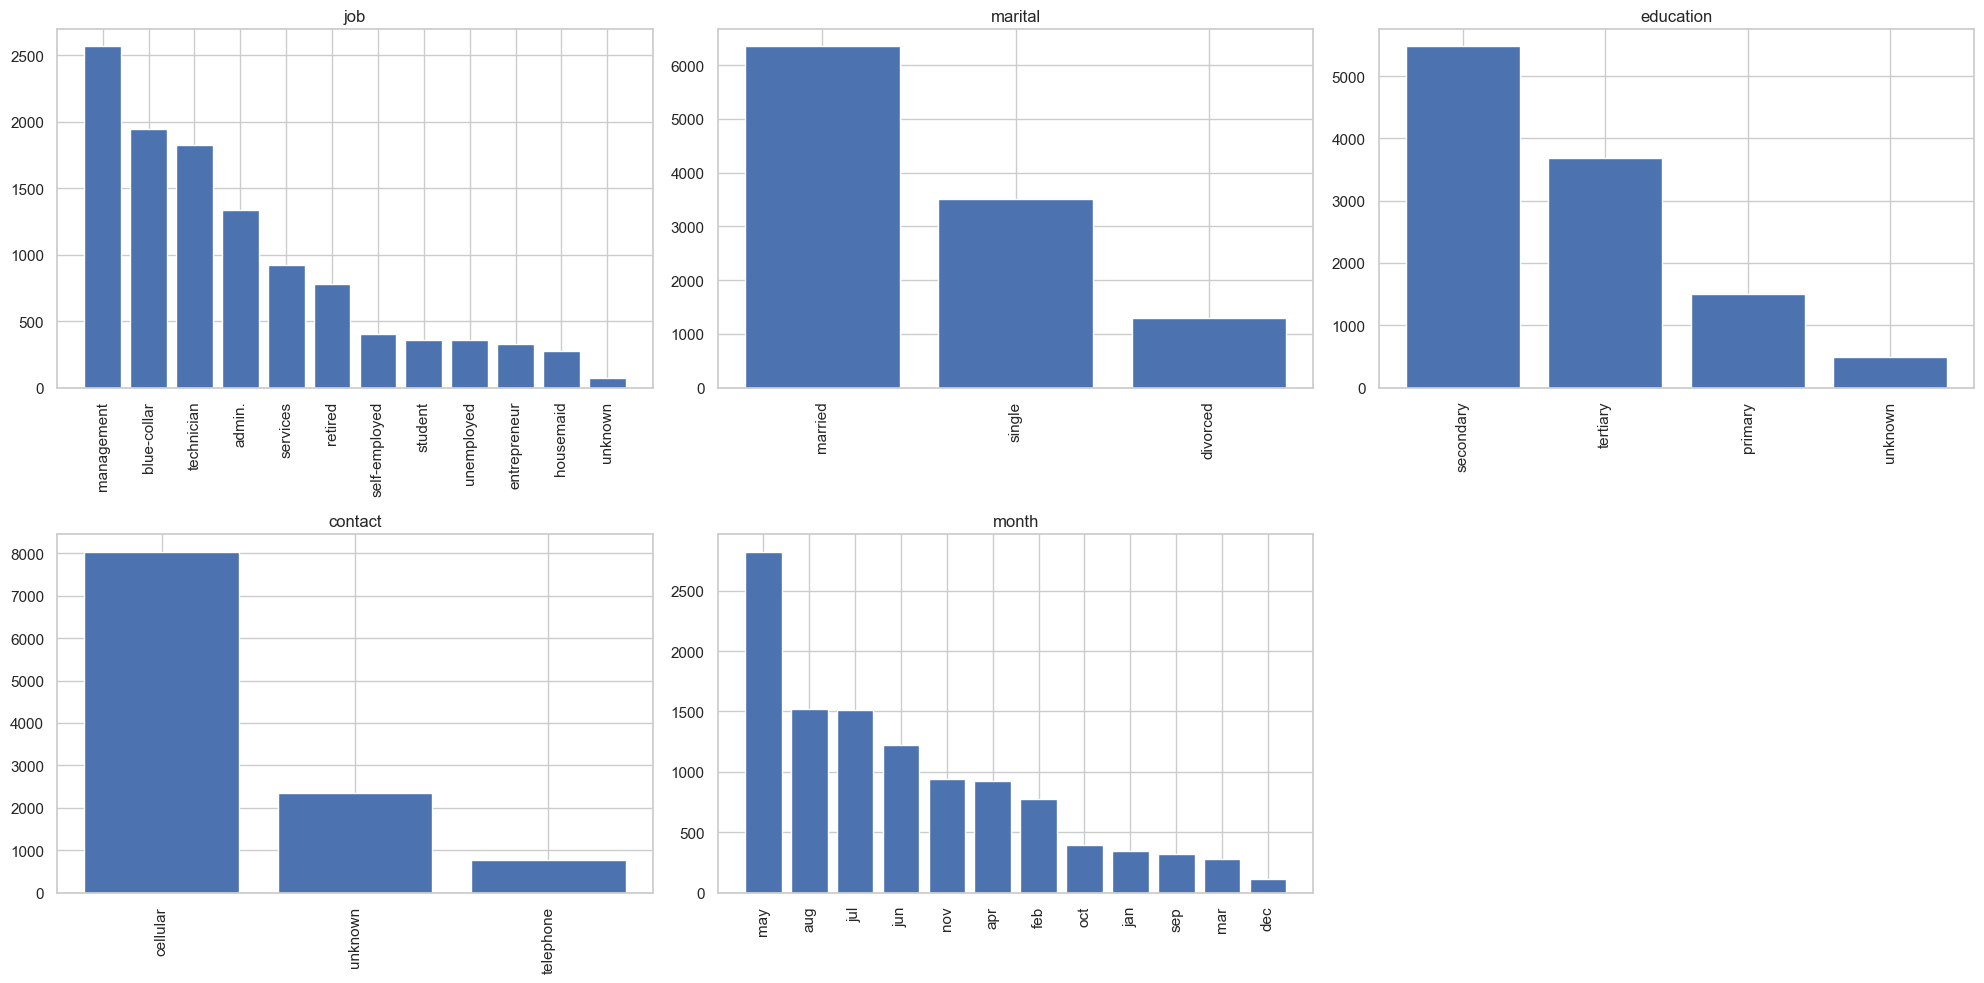

In [24]:
cat_columns = ['job', 'marital', 'education', 'contact', 'month']
fig, axs = plt.subplots(2, 3, sharex=False, sharey=False, figsize=(20, 10))

axs = axs.flatten()
for i, cat_column in enumerate(cat_columns):
    value_counts = df[cat_column].value_counts()
    
    x_pos = np.arange(len(value_counts))
    
    axs[i].bar(x_pos, value_counts.values, tick_label=value_counts.index)
    axs[i].set_title(cat_column)
    
    for tick in axs[i].get_xticklabels():
        tick.set_rotation(90)
for j in range(len(cat_columns), len(axs)):
    fig.delaxes(axs[j])
plt.tight_layout()
plt.show()


Se puede apreciar en los siguientes gráficos las cantidades de personas que les llego la campaña categorizadas por la relación laboral, el estado civil, la educación, el medio por el cual se lo contacto y en que mes se lo hizo.

C:\Users\Pame\AppData\Local\Temp\ipykernel_12328\3883959003.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='deposit', y='count', data=value_counts_df, palette='pastel')


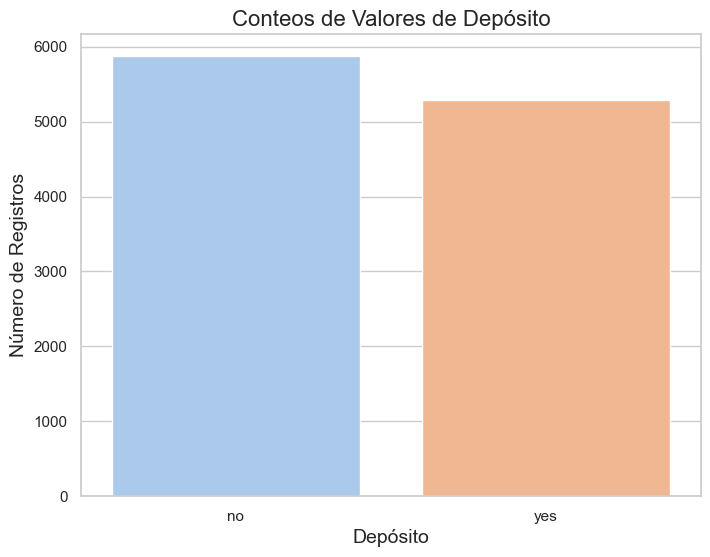

In [25]:
value_counts = df['deposit'].value_counts()
value_counts_df = value_counts.reset_index()
value_counts_df.columns = ['deposit', 'count']
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='deposit', y='count', data=value_counts_df, palette='pastel')
ax.set_title('Conteos de Valores de Depósito', fontsize=16)
ax.set_xlabel('Depósito', fontsize=14)
ax.set_ylabel('Número de Registros', fontsize=14)
plt.show()

En este gráfico se puede ver que el total de personas en que la campaña dio resultados y depositaron, es aproximadamente menos de la mitad, del total de personas que les llego la campaña, es decir, los daros estan balanceados.

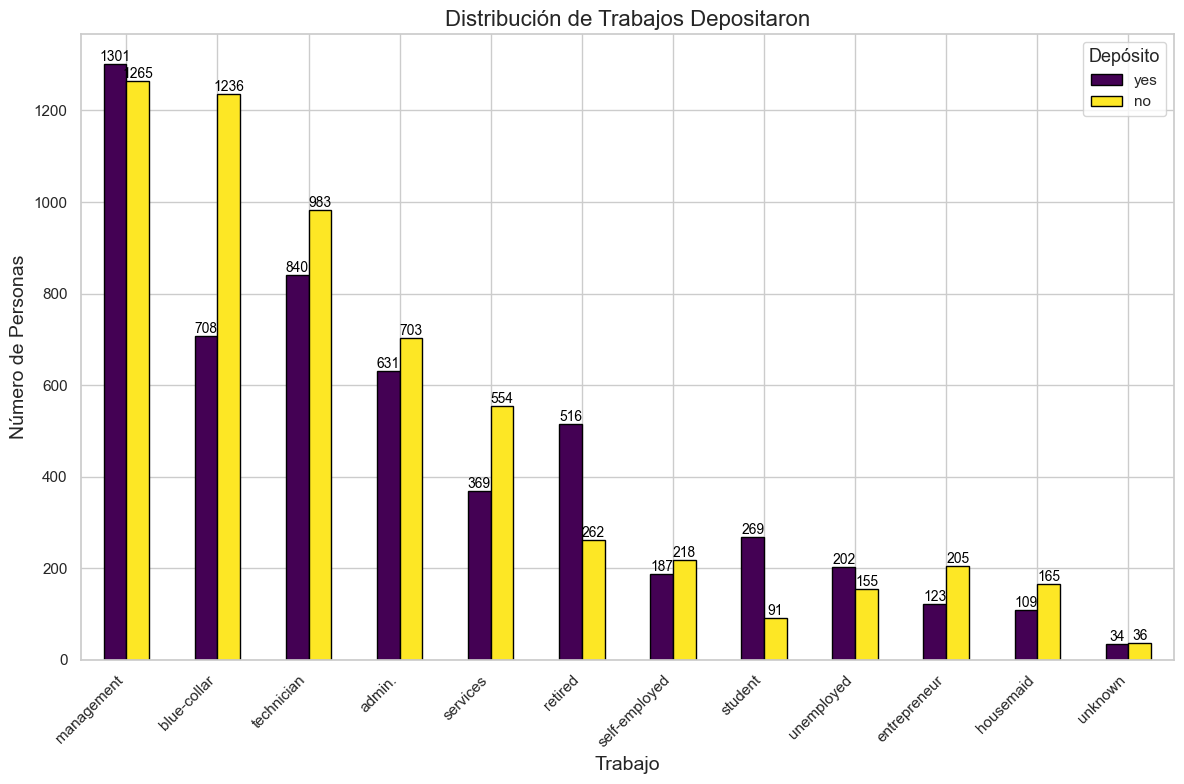

In [26]:
j_df = pd.DataFrame()

j_df['yes'] = df[df['deposit'] == 'yes']['job'].value_counts()
j_df['no'] = df[df['deposit'] == 'no']['job'].value_counts()
j_df = j_df.fillna(0)
j_df = j_df.loc[j_df.sum(axis=1).sort_values(ascending=False).index]
ax = j_df.plot(kind='bar', figsize=(12, 8), colormap='viridis', edgecolor='black')
ax.set_title('Distribución de Trabajos Depositaron', fontsize=16)
ax.set_xlabel('Trabajo', fontsize=14)
ax.set_ylabel('Número de Personas', fontsize=14)
ax.legend(title='Depósito', title_fontsize='13', fontsize='11')
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=10, color='black')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

En el gráfico de barras superior se puede analizar que tienen mas probabilidades de que depositen las personas con cargos de Management, los retirados y los estudiantes; y menos probabilidades de que la campaña surga efecto en personas que realizan trabajos físicos, quienes ofecen servicios y emprendedores

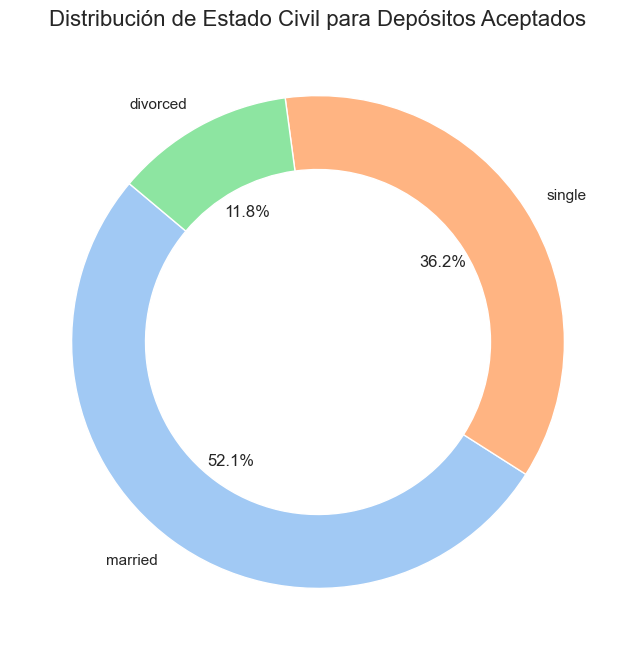

In [27]:
filtered_df = df[df['deposit'] == 'yes']
marital_counts = filtered_df['marital'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(marital_counts, labels=marital_counts.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'), startangle=140, wedgeprops=dict(width=0.3))
plt.title('Distribución de Estado Civil para Depósitos Aceptados', fontsize=16)
plt.show()

El gráfico muestra que tienen mas posisbilidades de depositos exitosos si la persona esta casada y lo contrario si esta divorsiada 

C:\Users\Pame\AppData\Local\Temp\ipykernel_12328\2523870062.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x="job", y="age", data=df, palette="Set2", notch=True, fliersize=5)


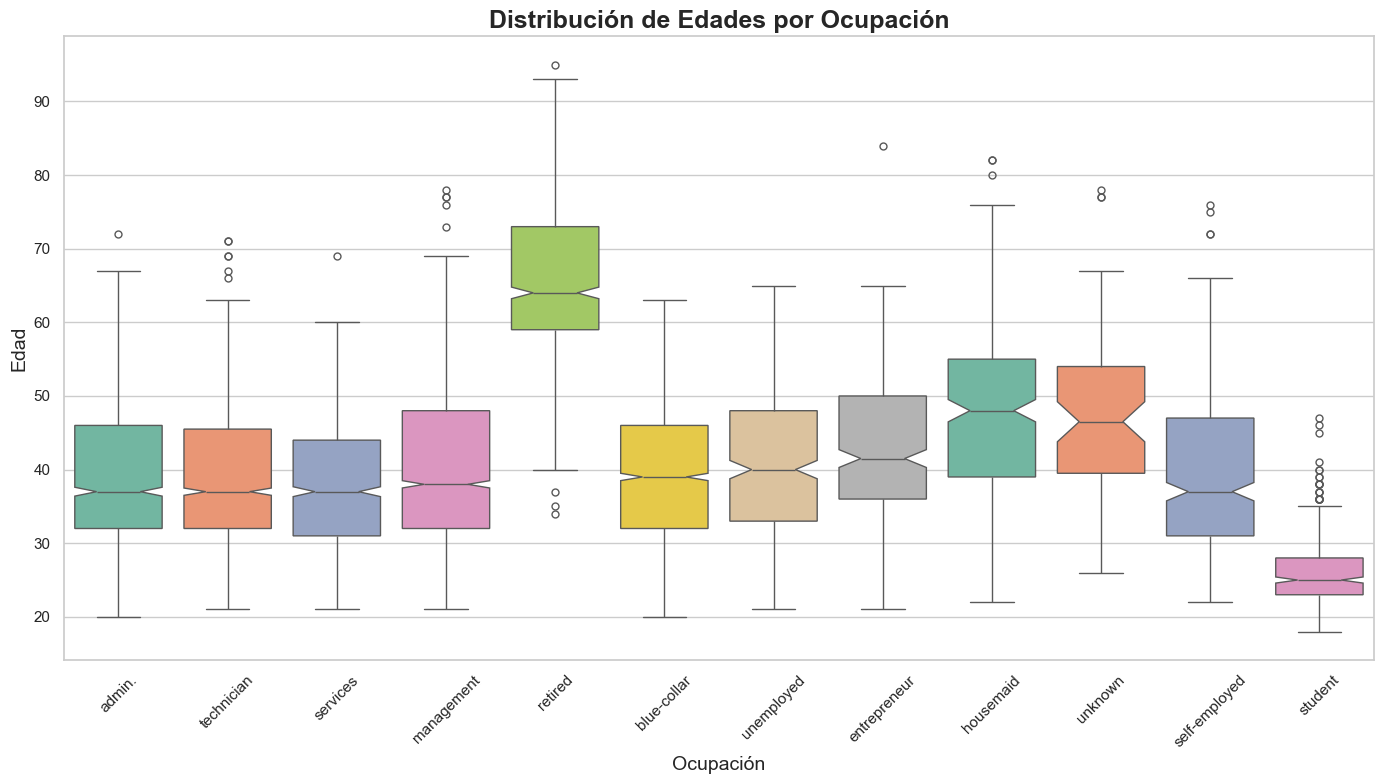

In [28]:
sns.set(style="whitegrid")
plt.figure(figsize=(14, 8))
ax = sns.boxplot(x="job", y="age", data=df, palette="Set2", notch=True, fliersize=5)
ax.set_title('Distribución de Edades por Ocupación', fontsize=18, weight='bold')
ax.set_xlabel('Ocupación', fontsize=14)
ax.set_ylabel('Edad', fontsize=14)
plt.xticks(rotation=45)
for i, artist in enumerate(ax.artists):
    artist.set_edgecolor('black')
    artist.set_linewidth(1.5)
plt.tight_layout()
plt.show()

Aquí se muestra la edad promedio por ocupación, con el fin de analizar las edades de las personas a quien deben dirigirse las campañas.

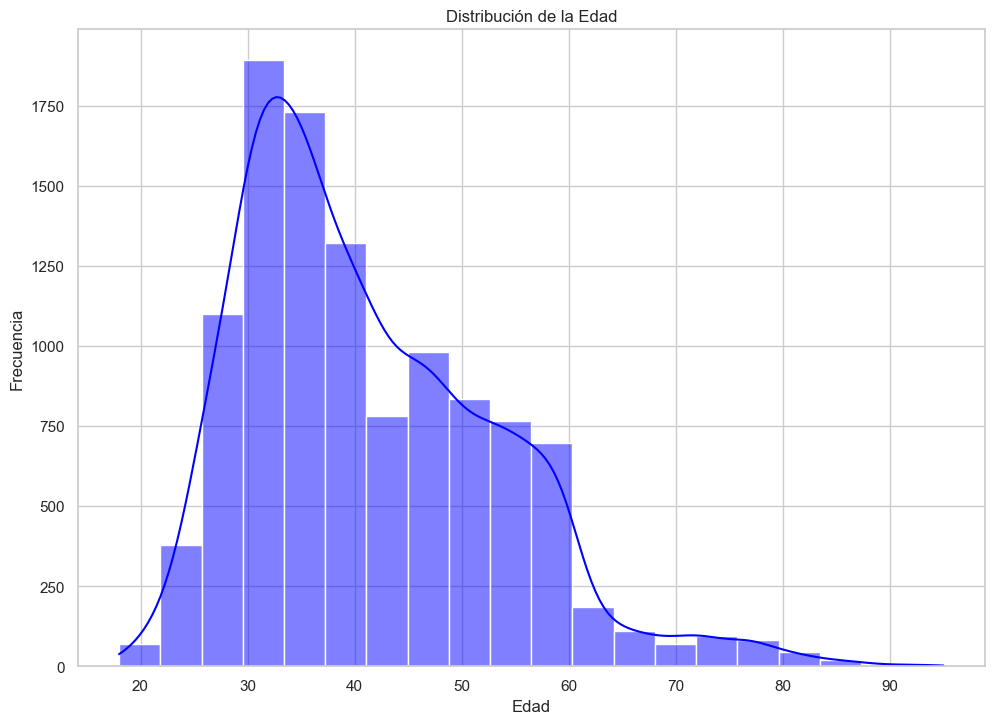

In [29]:
import seaborn as sns
sns.histplot(df['age'], kde=True, bins=20, color='blue')
plt.title('Distribución de la Edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()


C:\Users\Pame\AppData\Local\Temp\ipykernel_12328\3605844808.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(df["education"].unique(), rotation=0, rotation_mode="anchor")


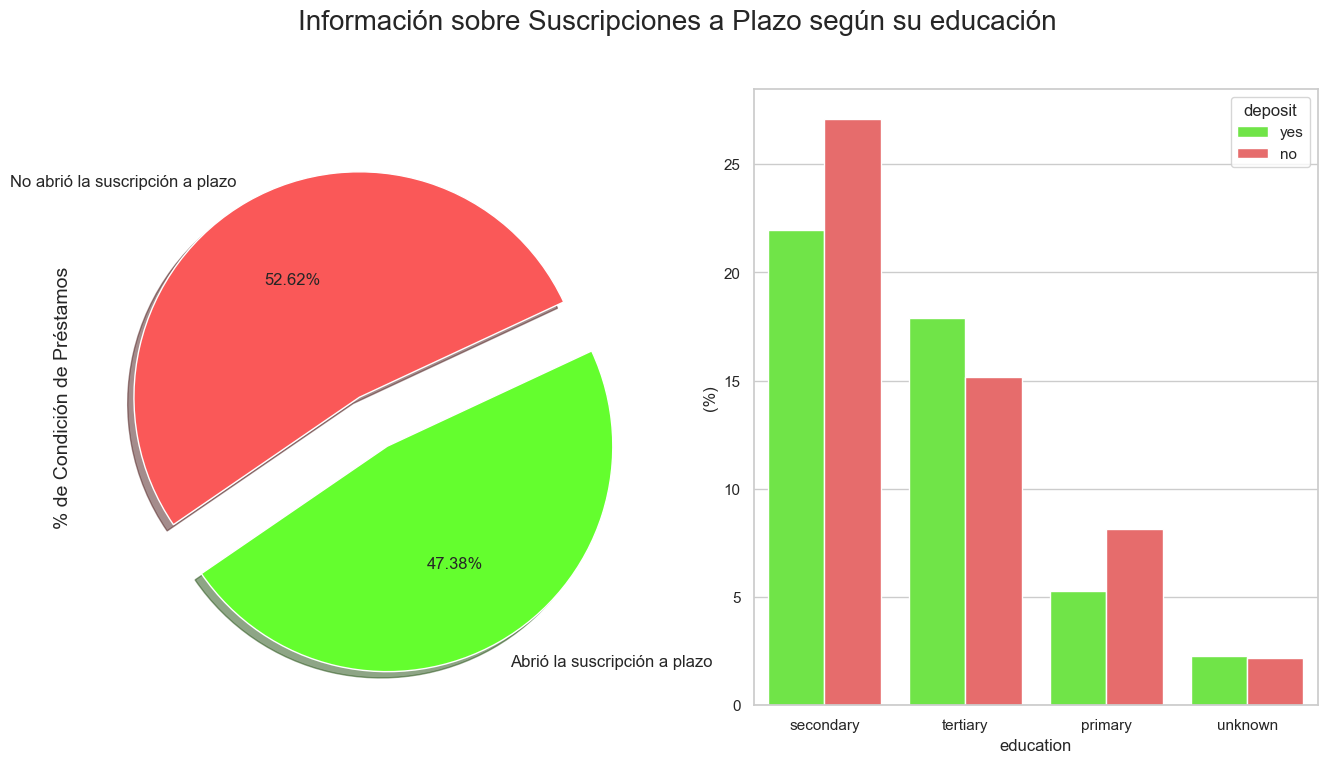

In [30]:
f, ax = plt.subplots(1,2, figsize=(16,8))

colors = ["#FA5858", "#64FE2E"]
labels ="No abrió la suscripción a plazo", "Abrió la suscripción a plazo"

plt.suptitle('Información sobre Suscripciones a Plazo según su educación', fontsize=20)

df["deposit"].value_counts().plot.pie(explode=[0,0.25], autopct='%1.2f%%', ax=ax[0], shadow=True, colors=colors, 
                                             labels=labels, fontsize=12, startangle=25)



ax[0].set_ylabel('% de Condición de Préstamos', fontsize=14)

palette = ["#64FE2E", "#FA5858"]

sns.barplot(x="education", y="balance", hue="deposit", data=df, palette=palette, estimator=lambda x: len(x) / len(df) * 100)
ax[1].set(ylabel="(%)")
ax[1].set_xticklabels(df["education"].unique(), rotation=0, rotation_mode="anchor")
plt.show()

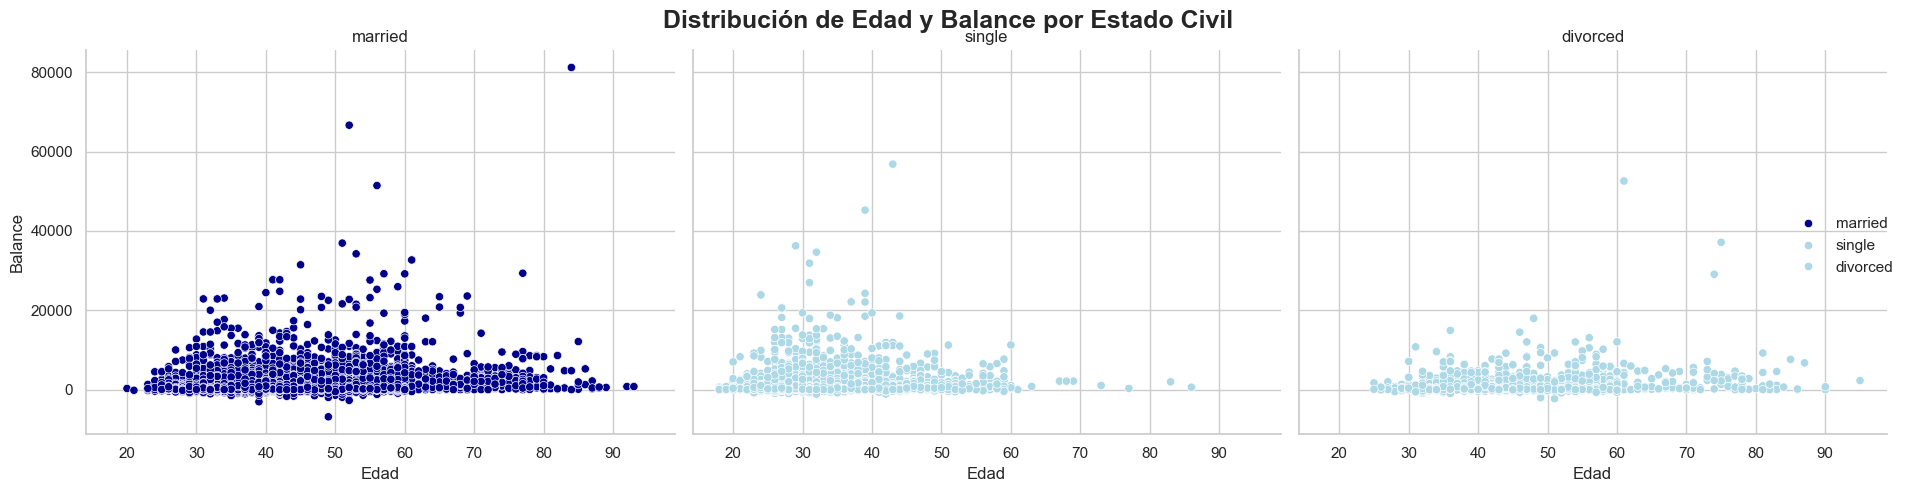

In [31]:
marital_counts = df['marital'].value_counts()
color_map = {
    'married': 'darkblue' if marital_counts['married'] > 4000 else 'lightblue',
    'single': 'darkblue' if marital_counts['single'] > 40000 else 'lightblue',
    'divorced': 'darkblue' if marital_counts['divorced'] > 40000 else 'lightblue'
}
sns.set(style="whitegrid")
g = sns.FacetGrid(df, col="marital", col_wrap=3, height=5, aspect=1.2)
g.map_dataframe(sns.scatterplot, x="age", y="balance", hue="marital", palette=color_map)
g.add_legend()
g.set_titles(col_template="{col_name}")
g.set_axis_labels("Edad", "Balance")
g.fig.suptitle('Distribución de Edad y Balance por Estado Civil', fontsize=18, weight='bold')
g.fig.tight_layout()
g.fig.subplots_adjust(top=0.9)
plt.show()



En estos gráficos se muestra la distribución del balance analizando su edad y estado civil. Si los datos analizados son mas de 40.000, en el gráfico se refeljaran con un color azul oscuro.

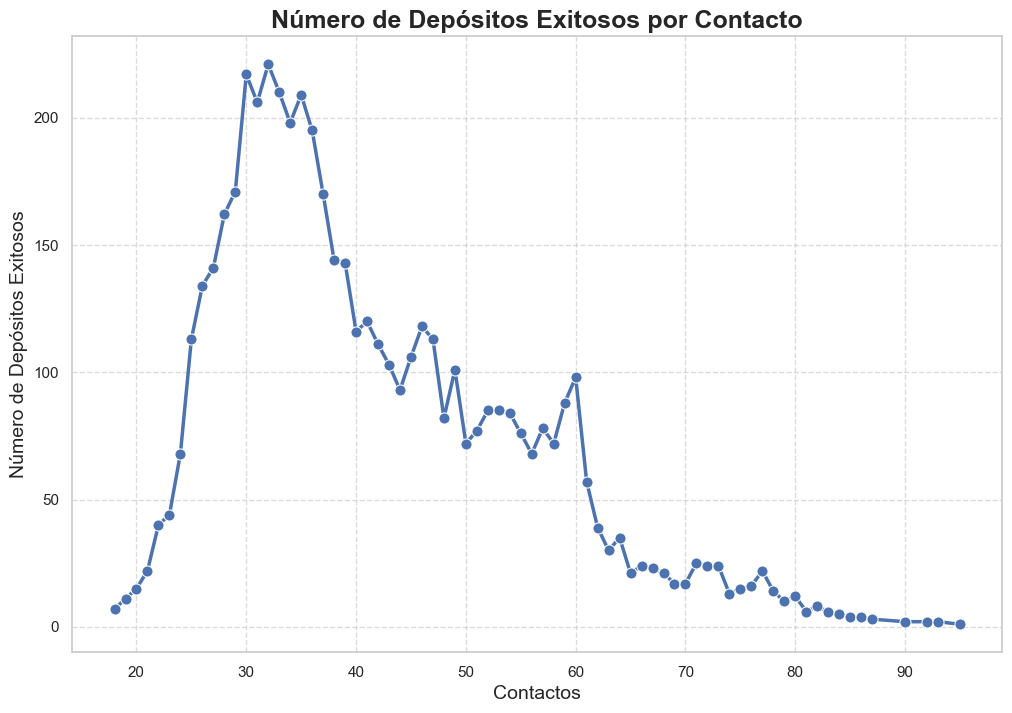

In [32]:
successful_deposits_df = df[df['deposit'] == 'yes']
duration_deposit_counts = successful_deposits_df['age'].value_counts().sort_index()
duration_deposit_df = pd.DataFrame({
    'age': duration_deposit_counts.index,
    'count': duration_deposit_counts.values
})
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))
sns.lineplot(data=duration_deposit_df, x='age', y='count', marker='o', color='b', linewidth=2.5, markersize=8)
plt.title('Número de Depósitos Exitosos por Contacto', fontsize=18, weight='bold')
plt.xlabel('Contactos', fontsize=14)
plt.ylabel('Número de Depósitos Exitosos', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

Se puede apreciar entre los 25 años y los 35 las personas tienen mas probabilidades de que depositen en el banco 

C:\Users\Pame\AppData\Local\Temp\ipykernel_12328\919906952.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'por_debajo_del_promedio' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  col.loc[col["duration"] < avg_duration, "duration_status"] = "por_debajo_del_promedio"


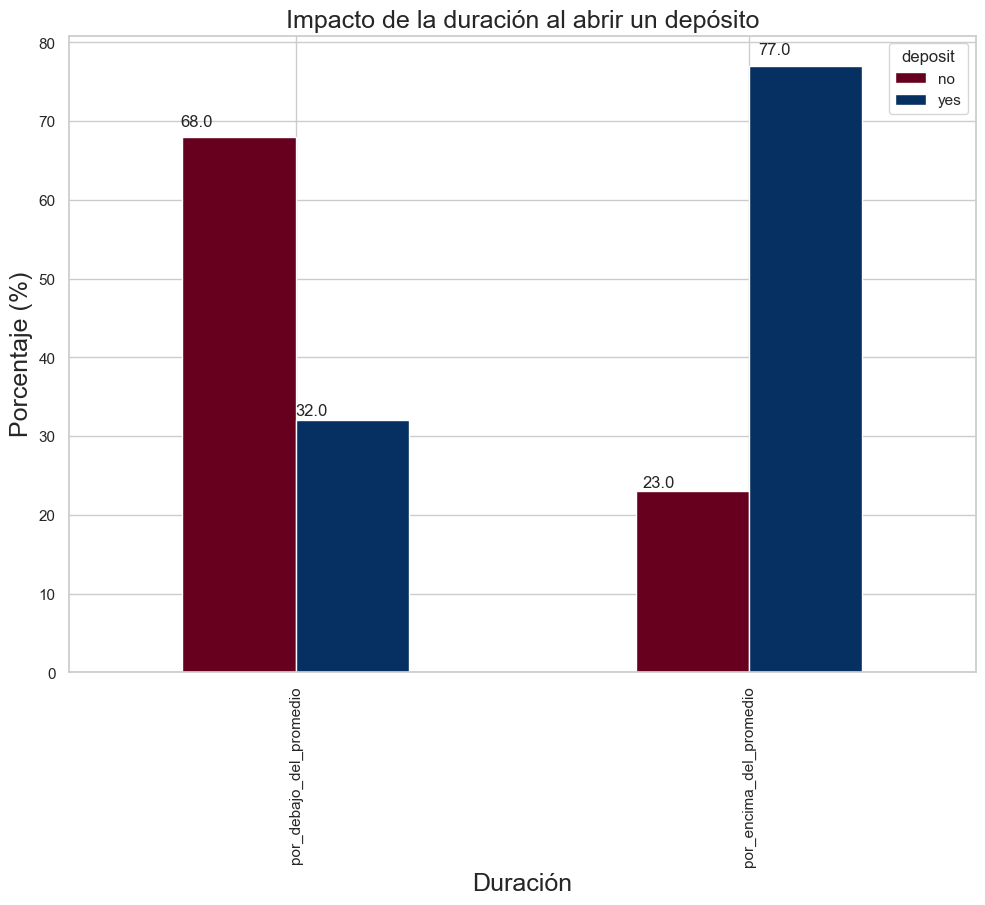

In [33]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style('whitegrid')
avg_duration = df['duration'].mean()

lst = [df]
df["duration_status"] = np.nan

for col in lst:
    col.loc[col["duration"] < avg_duration, "duration_status"] = "por_debajo_del_promedio"
    col.loc[col["duration"] > avg_duration, "duration_status"] = "por_encima_del_promedio"
    
pct_term = pd.crosstab(df['duration_status'], df['deposit']).apply(lambda r: round(r/r.sum(), 2) * 100, axis=1)


ax = pct_term.plot(kind='bar', stacked=False, cmap='RdBu')
plt.title("Impacto de la duración al abrir un depósito", fontsize=18)
plt.xlabel("Duración", fontsize=18);
plt.ylabel("Porcentaje (%)", fontsize=18)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.02, p.get_height() * 1.02))
    

plt.show()

Analizamos si las duraciones más largas o más cortas afectan la probabilidad de que un cliente abra un depósito a plazo. Cuando la llamada dura arriba del promedio se ve que claramente que el cliente tiene mas posibilidades de que acepte un deposito. 

## Limpieza de datos para los modelos

In [34]:
def get_dummy_from_bool(row, column_name):
    ''' Returns 0 if value in column_name is no, returns 1 if value in column_name is yes'''
    return 1 if row[column_name] == 'yes' else 0

def get_correct_values(row, column_name, threshold, df):
    ''' Returns mean value if value in column_name is above threshold'''
    if row[column_name] <= threshold:
        return row[column_name]
    else:
        mean = df[df[column_name] <= threshold][column_name].mean()
        return mean

def clean_data(df):
    '''
    INPUT
    df - pandas dataframe containing bank marketing campaign dataset
    
    OUTPUT
    df - cleaned dataset:
    1. columns with 'yes' and 'no' values are converted into boolean variables;
    2. categorical columns are converted into dummy variables;
    3. drop irrelevant columns.
    4. impute incorrect values
    '''
    
    cleaned_df = df.copy()
    
    bool_columns = ['default', 'housing', 'loan', 'deposit']
    for bool_col in bool_columns:
        cleaned_df[bool_col + '_bool'] = df.apply(lambda row: get_dummy_from_bool(row, bool_col),axis=1)
    
    cleaned_df = cleaned_df.drop(columns = bool_columns)
    
    cat_columns = ['job', 'marital', 'education', 'contact', 'month', 'poutcome']
    
    for col in  cat_columns:
        cleaned_df = pd.concat([cleaned_df.drop(col, axis=1),
                                pd.get_dummies(cleaned_df[col], prefix=col, prefix_sep='_',
                                               drop_first=True, dummy_na=False)], axis=1)

    
    return cleaned_df

In [35]:
cleaned_df = clean_data(df)
cleaned_df.shape


(11162, 41)

## Reemplazar "True" por 1 y "False" por 0

In [41]:
cleaned_df.head (5)

,age,balance,day,duration,duration_status,default_bool,housing_bool,loan_bool,deposit_bool,job_blue-collar,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,59,2343,5,1042,por_encima_del_promedio,0,1,0,1,False,...,False,False,False,True,False,False,False,False,False,True
1,56,45,5,1467,por_encima_del_promedio,0,0,0,1,False,...,False,False,False,True,False,False,False,False,False,True
2,41,1270,5,1389,por_encima_del_promedio,0,1,0,1,False,...,False,False,False,True,False,False,False,False,False,True
3,55,2476,5,579,por_encima_del_promedio,0,1,0,1,False,...,False,False,False,True,False,False,False,False,False,True
4,54,184,5,673,por_encima_del_promedio,0,0,0,1,False,...,False,False,False,True,False,False,False,False,False,True


In [47]:
cleaned_df = cleaned_df.replace({'True': 1, 'False': 0})

bool_columns = cleaned_df.columns[cleaned_df.isin([0, 1]).all()]

cleaned_df[bool_columns] = cleaned_df[bool_columns].astype(int)

print(cleaned_df)



       age  balance  day  duration          duration_status  default_bool  \
0       59     2343    5      1042  por_encima_del_promedio             0   
1       56       45    5      1467  por_encima_del_promedio             0   
2       41     1270    5      1389  por_encima_del_promedio             0   
3       55     2476    5       579  por_encima_del_promedio             0   
4       54      184    5       673  por_encima_del_promedio             0   
...    ...      ...  ...       ...                      ...           ...   
11157   33        1   20       257  por_debajo_del_promedio             0   
11158   39      733   16        83  por_debajo_del_promedio             0   
11159   32       29   19       156  por_debajo_del_promedio             0   
11160   43        0    8         9  por_debajo_del_promedio             0   
11161   34        0    9       628  por_encima_del_promedio             0   

       housing_bool  loan_bool  deposit_bool  job_blue-collar  ...  month_j

In [48]:
cleaned_df.head()

,age,balance,day,duration,duration_status,default_bool,housing_bool,loan_bool,deposit_bool,job_blue-collar,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,59,2343,5,1042,por_encima_del_promedio,0,1,0,1,0,...,0,0,0,1,0,0,0,0,0,1
1,56,45,5,1467,por_encima_del_promedio,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
2,41,1270,5,1389,por_encima_del_promedio,0,1,0,1,0,...,0,0,0,1,0,0,0,0,0,1
3,55,2476,5,579,por_encima_del_promedio,0,1,0,1,0,...,0,0,0,1,0,0,0,0,0,1
4,54,184,5,673,por_encima_del_promedio,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1


In [80]:
cleaned_df = cleaned_df.drop(columns='duration_status')

KeyError: "['duration_status'] not found in axis"

In [68]:
df = df.drop(columns='duration_status')

In [57]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  11162 non-null  int64
 1   balance              11162 non-null  int64
 2   day                  11162 non-null  int64
 3   duration             11162 non-null  int64
 4   default_bool         11162 non-null  int64
 5   housing_bool         11162 non-null  int64
 6   loan_bool            11162 non-null  int64
 7   deposit_bool         11162 non-null  int64
 8   job_blue-collar      11162 non-null  int64
 9   job_entrepreneur     11162 non-null  int64
 10  job_housemaid        11162 non-null  int64
 11  job_management       11162 non-null  int64
 12  job_retired          11162 non-null  int64
 13  job_self-employed    11162 non-null  int64
 14  job_services         11162 non-null  int64
 15  job_student          11162 non-null  int64
 16  job_technician       1

In [58]:
X = cleaned_df.drop(columns = 'deposit_bool')
y = cleaned_df[['deposit_bool']]

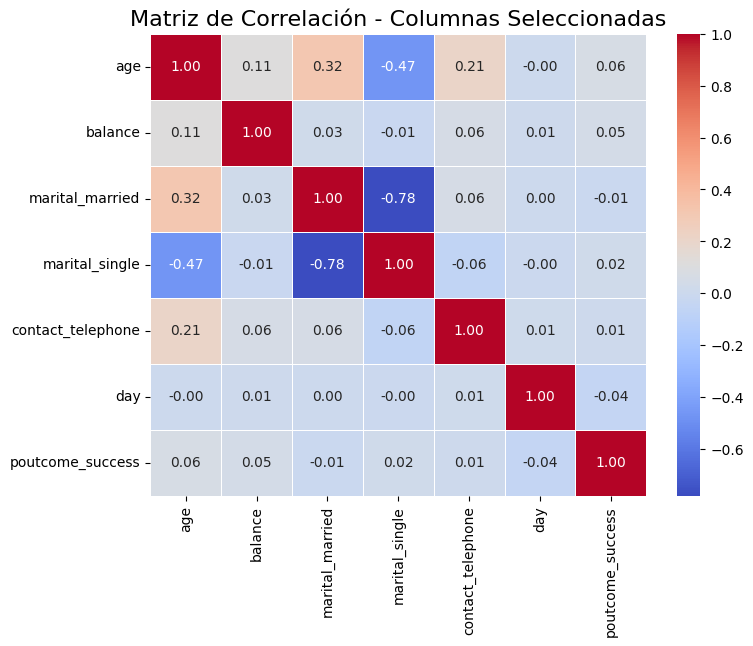

In [59]:
selected_columns = ['age', 'balance', 'marital_married','marital_single','contact_telephone','day','poutcome_success']  
subset_df = cleaned_df[selected_columns]

corr_matrix = subset_df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación - Columnas Seleccionadas', fontsize=16)
plt.show()

# Caracteristicas

## ¿Qué características influyen en el resultado de una suscripción de depósito a plazo?
Clasificador de árbol de decisión:
Las tres características más importantes de nuestro clasificador son **Duración (cuánto tiempo duró la conversación entre el representante de ventas y el cliente potencial), contacto (número de contactos con el cliente potencial dentro de la misma campaña de marketing), mes (el mes del año).

### Se eliminan los outliers

In [60]:
Q1 = cleaned_df.quantile(0.02)
Q3 = cleaned_df.quantile(0.98)
IQR = Q3 - Q1
print(IQR)

age                       48.00
balance                10453.00
day                       28.00
duration                1349.34
default_bool               0.00
housing_bool               1.00
loan_bool                  1.00
deposit_bool               1.00
job_blue-collar            1.00
job_entrepreneur           1.00
job_housemaid              1.00
job_management             1.00
job_retired                1.00
job_self-employed          1.00
job_services               1.00
job_student                1.00
job_technician             1.00
job_unemployed             1.00
job_unknown                0.00
marital_married            1.00
marital_single             1.00
education_secondary        1.00
education_tertiary         1.00
education_unknown          1.00
contact_telephone          1.00
contact_unknown            1.00
month_aug                  1.00
month_dec                  0.00
month_feb                  1.00
month_jan                  1.00
month_jul                  1.00
month_ju

In [61]:
cleaned_df = cleaned_df[~((cleaned_df < (Q1 - 0.2 * IQR)) |(cleaned_df > (Q3 + 0.2 * IQR))).any(axis=1)]
cleaned_df.shape

(10546, 40)

### Se seleccionan las variables por importancia

Feature ranking:
1. feature 11 (0.593759)
2. feature 8 (0.130661)
3. feature 12 (0.126242)
4. feature 6 (0.066444)
5. feature 10 (0.030982)
6. feature 5 (0.027129)
7. feature 0 (0.016946)
8. feature 3 (0.005302)
9. feature 2 (0.001284)
10. feature 9 (0.001251)
11. feature 7 (0.000000)
12. feature 4 (0.000000)
13. feature 1 (0.000000)


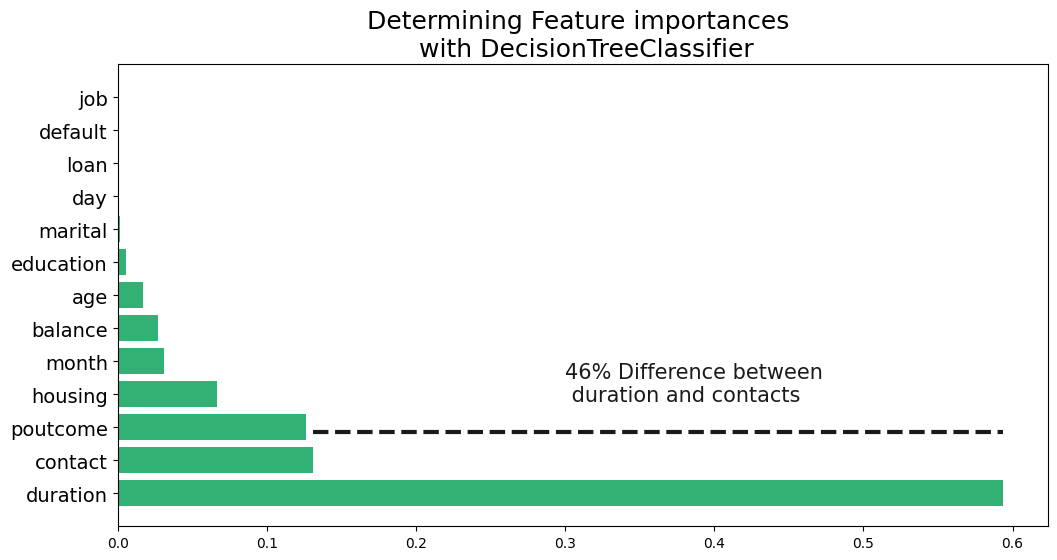

In [69]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
sns.set(style="whitegrid")
plt.style.use('default')

df['job'] = df['job'].astype('category').cat.codes
df['marital'] = df['marital'].astype('category').cat.codes
df['education'] = df['education'].astype('category').cat.codes
df['contact'] = df['contact'].astype('category').cat.codes
df['poutcome'] = df['poutcome'].astype('category').cat.codes
df['month'] = df['month'].astype('category').cat.codes
df['default'] = df['default'].astype('category').cat.codes
df['loan'] = df['loan'].astype('category').cat.codes
df['housing'] = df['housing'].astype('category').cat.codes

target_name = 'deposit'
X = df.drop('deposit', axis=1)


label=df[target_name]

X_train, X_test, y_train, y_test = train_test_split(X,label,test_size=0.2, random_state=42, stratify=label)


tree = tree.DecisionTreeClassifier(
    class_weight='balanced',
    min_weight_fraction_leaf = 0.01
    
)



tree = tree.fit(X_train, y_train)
importances = tree.feature_importances_
feature_names = df.drop('deposit', axis=1).columns
indices = np.argsort(importances)[::-1]


print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))


def feature_importance_graph(indices, importances, feature_names):
    plt.figure(figsize=(12,6))
    plt.title("Determining Feature importances \n with DecisionTreeClassifier", fontsize=18)
    plt.barh(range(len(indices)), importances[indices], color='#31B173',  align="center")
    plt.yticks(range(len(indices)), feature_names[indices], rotation='horizontal',fontsize=14)
    plt.ylim([-1, len(indices)])
    plt.axhline(y=1.85, xmin=0.21, xmax=0.952, color='k', linewidth=3, linestyle='--')
    plt.text(0.30, 2.8, '46% Difference between \n duration and contacts', color='k', fontsize=15)
    
feature_importance_graph(indices, importances, feature_names)
plt.show()

# Modelos

In [70]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import xgboost

## Divido el dataframe en train y test 

In [71]:

from sklearn.model_selection import train_test_split

feature_columns = ['age', 'marital_married', 'balance' , 'job_student', 'day']  
target_column = 'poutcome_success'  

X = cleaned_df[feature_columns]
y = cleaned_df[target_column]

TEST_SIZE = 0.2
RAND_STATE = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=RAND_STATE)


## XGBOOST

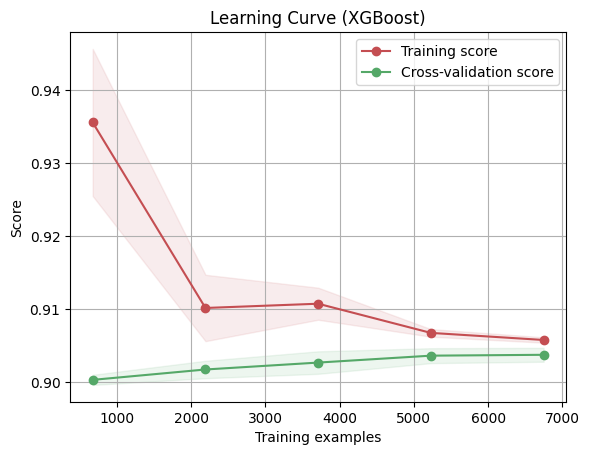

XGB accuracy score for train: 0.905: test: 0.911


In [102]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.metrics import accuracy_score
import xgboost as xgboost


xgb = xgboost.XGBClassifier(n_estimators=500, learning_rate=0.01, gamma=0.5, subsample=0.75,
                           colsample_bytree=0.75, max_depth=7)

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

plot_learning_curve(xgb, "Learning Curve (XGBoost)", X_train, y_train.squeeze().values, cv=5)
plt.show()

xgb.fit(X_train, y_train.squeeze().values)

y_train_preds = xgb.predict(X_train)
y_test_preds = xgb.predict(X_test)

print('XGB accuracy score for train: %.3f: test: %.3f' % (
        accuracy_score(y_train, y_train_preds),
        accuracy_score(y_test, y_test_preds)))

Se puede ver en la curva de validación del modelo XGBOOST que el modelo está generalizando bien y no indica overfitting ni underfitting, es decir, no se necesita mejorar el modelo ni agregar más datos, ya que el a medida que aumenta el número de ejemplos el puntaje de rendimiento y el puntaje de validación cruzada se aproximan. Al principio con pocos ejemplos (menos de 2000), el modelo tiene un score de entrenamiento muy alto (0.935) pero un score de validación más bajo (0.90). Esto es un claro indicio de sobreajuste: El modelo está aprendiendo demasiado los detalles específicos del conjunto de entrenamiento, incluyendo el ruido, lo que perjudica su capacidad para generalizar a nuevos datos. A medida que aumentan los ejemplos de entrenamiento (más de 2000), el modelo tiene más datos para aprender, lo que reduce el sobreajuste. La línea roja (entrenamiento) baja de 0.935 a 0.911, lo que indica que el modelo ya no se ajusta perfectamente a los datos de entrenamiento, pero esto es positivo porque está aprendiendo patrones más generales. La línea verde (validación) sube ligeramente de 0.90 a 0.911, lo que muestra que el modelo está generalizando mejor. Al final (7000 ejemplos), ambas líneas convergen en un score de 0.911. Esto indica que el modelo ha alcanzado un equilibrio entre el rendimiento en el conjunto de entrenamiento y el de validación. Sin embargo, el score final es relativamente bajo (0.911), aún cuando se usó Grid Search para optimizar los hiperparámetros, usando el algoritmo que más se aproximaba a un rendimiento alto, complejizando aún más el modelo usando max_depth y n_estimators, el problema podría estar en la calidad de los datos, los datos pueden contener ruido, características irrelevantes o falta de información útil para el modelo.

In [86]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from sklearn.metrics import accuracy_score

xgb_model = xgb.XGBClassifier()

param_grid = {
    'n_estimators': [100, 300, 500], 
    'learning_rate': [0.01, 0.05, 0.1, 0.2], 
    'max_depth': [3, 5, 7, 10], 
    'gamma': [0, 0.1, 0.2, 0.5], 
    'subsample': [0.5, 0.75, 1], 
    'colsample_bytree': [0.5, 0.75, 1]  
}

grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='accuracy',  
    cv=5, 
    verbose=1,
    n_jobs=-1  
)

grid_search.fit(X_train, y_train.squeeze().values)

print("Mejores parámetros encontrados:", grid_search.best_params_)

best_xgb = grid_search.best_estimator_
y_train_preds = best_xgb.predict(X_train)
y_test_preds = best_xgb.predict(X_test)

print('XGB accuracy score - Train: %.3f | Test: %.3f' % (
        accuracy_score(y_train, y_train_preds),
        accuracy_score(y_test, y_test_preds)))


Fitting 5 folds for each of 1728 candidates, totalling 8640 fits
Mejores parámetros encontrados: {'colsample_bytree': 0.75, 'gamma': 0.5, 'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 500, 'subsample': 0.75}
XGB accuracy score - Train: 0.905 | Test: 0.911


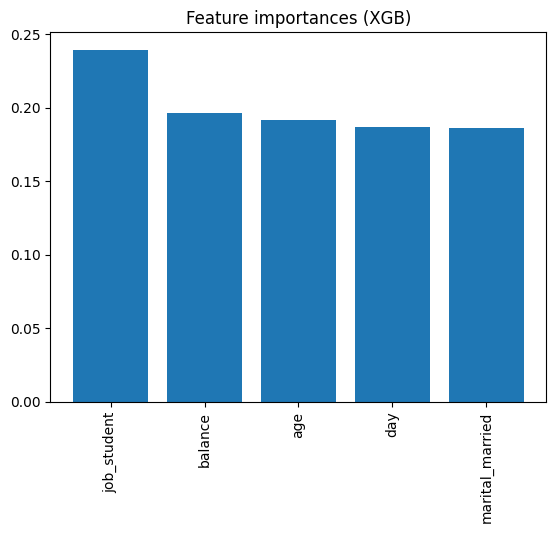

In [73]:

headers = ["name", "score"]
values = sorted(zip(X_train.columns, xgb.feature_importances_), key=lambda x: x[1] * -1)
xgb_feature_importances = pd.DataFrame(values, columns = headers)

x_pos = np.arange(0, len(xgb_feature_importances))
plt.bar(x_pos, xgb_feature_importances['score'])
plt.xticks(x_pos, xgb_feature_importances['name'])
plt.xticks(rotation=90)
plt.title('Feature importances (XGB)')

plt.show()

## KNN

In [95]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(metric= 'euclidean', n_neighbors= 20, weights= 'uniform')  
knn.fit(X_train, y_train)


y_train_preds = knn.predict(X_train)
y_test_preds = knn.predict(X_test)

print('KNN accuracy score for train: %.3f; test: %.3f' % (
        accuracy_score(y_train, y_train_preds),
        accuracy_score(y_test, y_test_preds)))


KNN accuracy score for train: 0.904; test: 0.911


En cuanto al modelo KNN dio casi el mismo score que el modelo XGBOOTS, teniendo un score de entrenamiento apenas menor, de una diferencia de 0.01

In [90]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier()

param_grid = {
    'n_neighbors': range(1, 21), 
    'weights': ['uniform', 'distance'], 
    'metric': ['euclidean', 'manhattan', 'minkowski'] 
}

grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print(f"Mejores parámetros encontrados: {best_params}")

best_knn = KNeighborsClassifier(**best_params)
best_knn.fit(X_train, y_train)

y_train_preds = best_knn.predict(X_train)
y_test_preds = best_knn.predict(X_test)

print('KNN accuracy score for train: %.3f; test: %.3f' % (
    accuracy_score(y_train, y_train_preds),
    accuracy_score(y_test, y_test_preds)
))


Mejores parámetros encontrados: {'metric': 'euclidean', 'n_neighbors': 20, 'weights': 'uniform'}
KNN accuracy score for train: 0.904; test: 0.911


## RANDOM FOREST

In [83]:

from sklearn.ensemble import RandomForestClassifier 

rf = RandomForestClassifier(n_estimators=100, max_depth=7, random_state=RAND_STATE) 
rf.fit(X_train, y_train)

y_train_preds = rf.predict(X_train)
y_test_preds = rf.predict(X_test)

print('Random Forest accuracy score for train: %.3f; test: %.3f' % (
        accuracy_score(y_train, y_train_preds),
        accuracy_score(y_test, y_test_preds)))


Random Forest accuracy score for train: 0.904; test: 0.911


## GAUSSIAN NATIVE BAYES

In [76]:

from sklearn.naive_bayes import GaussianNB 

gnb = GaussianNB()
gnb.fit(X_train, y_train)

y_train_preds = gnb.predict(X_train)
y_test_preds = gnb.predict(X_test)

print('Gaussian Naive Bayes accuracy score for train: %.3f; test: %.3f' % (
        accuracy_score(y_train, y_train_preds),
        accuracy_score(y_test, y_test_preds)))


Gaussian Naive Bayes accuracy score for train: 0.875; test: 0.883


Estos últimos dos modelos, el RANDOM FOREST y el GAUSSIAN NATIVE BAYES, tuvieron un rendimiento aún más bajo que los anteriores modelos vistos más arriba

## Porcentajes de suscripciones según la edad y el balance 

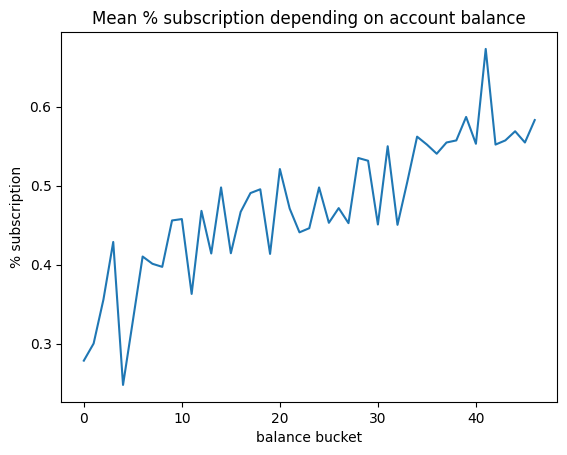

In [77]:
df_new = cleaned_df.copy()


df_new['balance_buckets'] = pd.qcut(df_new['balance'], 50, labels=False, duplicates = 'drop')


mean_deposit = df_new.groupby(['balance_buckets'])['deposit_bool'].mean()

#plot
plt.plot(mean_deposit.index, mean_deposit.values)
plt.title('Mean % subscription depending on account balance')
plt.xlabel('balance bucket')
plt.ylabel('% subscription')
plt.show()

In [78]:
df_new[df_new['balance_buckets'] == 34]['balance'].min()

np.int64(1585)

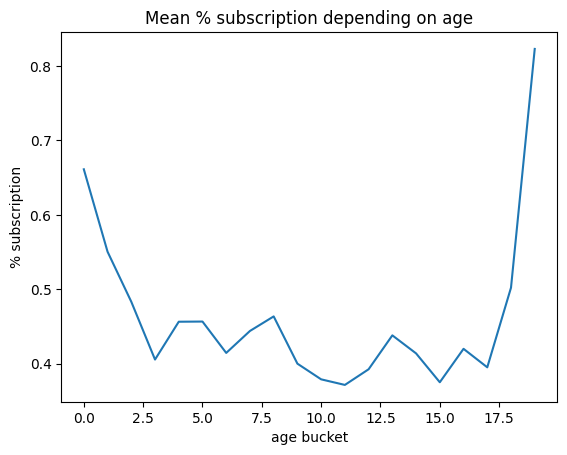

In [79]:
df_new['age_buckets'] = pd.qcut(df_new['age'], 20, labels=False, duplicates = 'drop')

mean_age = df_new.groupby(['age_buckets'])['deposit_bool'].mean()

#plot
plt.plot(mean_age.index, mean_age.values)
plt.title('Mean % subscription depending on age')
plt.xlabel('age bucket')
plt.ylabel('% subscription')
plt.show()

## Método de validación cruzada:

In [104]:
from sklearn.model_selection import cross_val_score
import xgboost as xgb


xgb_model = xgb.XGBClassifier(
    n_estimators=500,
    learning_rate=0.01,
    gamma=0.5,
    subsample=0.75,
    colsample_bytree=0.75,
    max_depth=7
)


xgb_scores = cross_val_score(xgb_model, X_train, y_train.squeeze(), cv=5, scoring='accuracy')


print("Scores de validación cruzada para XGBoost:", xgb_scores)
print("Precisión media de XGBoost: %.3f" % xgb_scores.mean())


from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5) 

knn_scores = cross_val_score(knn_model, X_train, y_train.squeeze(), cv=5, scoring='accuracy')

print("Scores de validación cruzada para KNN:", knn_scores)
print("Precisión media de KNN: %.3f" % knn_scores.mean())

Scores de validación cruzada para XGBoost: [0.9028436  0.90574985 0.90337878 0.90456432 0.90278601]
Precisión media de XGBoost: 0.904
Scores de validación cruzada para KNN: [0.89336493 0.88974511 0.89508002 0.88559573 0.89448726]
Precisión media de KNN: 0.892


Podemos ver que el metodo XGBOOST tiene una puntación media más alta que el método KNN utilizando el método de validación cruzada, contemplando los problemas que surgen de los sobreajustes, de la dependencia de divisiones de los datos y su uso ineficiente de ellos. 

# Conclusión:
Soluciones para la próxima campaña de marketing 
1) Meses de actividad de marketing: Vimos que el mes de mayor nivel de actividad de marketing fue el mes de mayo. Para la próxima campaña de marketing, será prudente que el banco centre la campaña de marketing durante los meses de marzo, septiembre, octubre y diciembre. (Se debe considerar diciembre porque fue el mes con la actividad de marketing más baja; podría haber una razón por la cual diciembre sea el más bajo).

2) Llamadas de Campaña: Se ve que si las llamadas se hacen por celular tiene mas chance que atienda y cuanto más larga sea la llamada, la campaña tendrá mayor éxito. Aunque esto no nos asegura que el cliente potencial suscriba un depósito a plazo ya que puede que la llamada dure mucho por que el cliente antes de la llamada estaba interesado en suscribirse a un deposito y quiere informarse más del mismo y no necesariamente una llamada de larga duración es el determinante potencial que debería prestarse atención para las campañas.

3) Categoría de edad: la próxima campaña de marketing del banco debe dirigirse a clientes potenciales de entre  25 y 35 años o más. 

4) Ocupación: los clientes potenciales son estudiantes, los más propensos a suscribir un depósito a plazo. 

5) Saldo de la cuenta: los clientes potenciales con saldos medios y altos tienen más probabilidades de abrir un depósito a plazo. Por último, la próxima campaña de marketing debería centrarse en personas con saldos medios y altos para aumentar la probabilidad de suscribir un depósito a plazo.

6) Situcion marital: Si la persona esta casada, tiene muchas más probabilidades de que acepta una suscripción. 

Al combinar todas estas estrategias y simplificar la audiencia del mercado a la que debe dirigirse la próxima campaña, es probable que la próxima campaña de marketing del banco sea más efectiva que la actual.